<a href="https://colab.research.google.com/github/Mauedy164/Hackathon_Alura/blob/main/Telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracción


In [303]:
import pandas as pd

In [304]:
datos = pd.read_json("https://raw.githubusercontent.com/Mauedy164/Hackathon_Alura/refs/heads/main/TelecomX_Data.json")

In [305]:
datos.sample(5)

,customerID,Churn,customer,phone,internet,account
1280,1841-YSJGV,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Two year', 'PaperlessBilling': '..."
6134,8395-ETZKQ,No,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'One year', 'PaperlessBilling': '..."
675,0959-WHOKV,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'One year', 'PaperlessBilling': '..."
1663,2361-FJWNO,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'No', 'MultipleLines': 'No ph...","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
4289,5897-ZYEKH,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'One year', 'PaperlessBilling': '..."


In [306]:
df = pd.DataFrame(datos)
df.sample(5)

,customerID,Churn,customer,phone,internet,account
726,1041-RXHRA,Yes,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
906,1271-SJBGZ,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'No', 'MultipleLines': 'No ph...","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
894,1262-OPMFY,Yes,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
1157,1641-RQDAY,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
1465,2100-BDNSN,Yes,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


Como los datos en cada columna vienen en diccionarios, se opta por usar la función normalize de pandas, con la finalidad de extraer cada clave-valor y convertirlas en columnas independientes para su mejor tratado de los datos

In [308]:
nombres_columnas = ['customer', 'phone', 'internet', 'account']
nombres_columnas

['customer', 'phone', 'internet', 'account']

In [309]:
for columna in nombres_columnas:
  df_normalizados = pd.json_normalize(df[columna]) #Extrae la clave-valor y la hace en columna (clave) y filas (valores)
  df = pd.concat([df,df_normalizados], axis=1)
df.sample(5)

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
5313,7251-XFOIL,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,0,No,No,...,No,Yes,No,No,Yes,Month-to-month,No,Mailed check,89.20,5500.6
2090,2933-FILNV,Yes,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'No', 'MultipleLines': 'No ph...","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,0,Yes,Yes,...,No,No,No,No,No,Month-to-month,Yes,Mailed check,24.40,36.55
135,0224-HJAPT,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,No,No,No,No,Month-to-month,No,Electronic check,47.15,223.15
6394,8780-IHCRN,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Two year', 'PaperlessBilling': '...",Male,0,Yes,Yes,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.65,1574.5
6304,8670-MEFCP,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '...",Female,0,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),92.90,3379.25


Se eliminan las primeras 5 columnas no normalizadas

In [310]:
df = df.drop(columns = nombres_columnas)
df.sample(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
1924,2720-WGKHP,Yes,Male,1,No,No,2,Yes,Yes,Fiber optic,...,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.00,181.7
2073,2920-RNCEZ,No,Male,0,Yes,Yes,1,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.95,69.95
349,0508-OOLTO,No,Female,0,Yes,Yes,2,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,71.65,135.75
6164,8439-LTUGF,No,Male,0,No,No,10,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.00,198.6
5938,8107-KNCIM,No,Male,1,Yes,No,14,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.10,1013.35


In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


Se genera lso datos limpios para el equipo Backend

In [312]:
df.to_csv('Datos_normalizados.csv', index=False, sep = ";")

Como el ID es un identificador único de cada cliente, esta información no es relevante para el comportamiento de un cliente, por lo cual eliminamos dicha columna

In [313]:
df = df.drop(columns=['customerID'])

## Comprobación de incoherencias

In [314]:
df['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [315]:
import numpy as np

In [316]:
df = df.replace(r'^\s*$', np.nan, regex=True)

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


Ya que el paso anterior elimina los espacios en blanco de Churn, se decide eliminar las filas que contengan espacios en blanco en la columna Churn

In [318]:
df.dropna(how='any', inplace=True)
df.reset_index(drop=True, inplace=True)

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [320]:
df.sample(5)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
4499,Yes,Female,0,No,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.6,95.6
3358,No,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.6,346.45
6633,No,Male,0,Yes,Yes,27,Yes,Yes,Fiber optic,No,Yes,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),85.2,2151.6
321,No,Female,0,Yes,No,19,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,96.8,1743.05
6953,No,Female,0,Yes,No,25,Yes,Yes,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,54.1,1373


Se identifica que la columna Charges.Total, tiene un formato de texto y es numérico, por lo cual se procede a realizar el cambio de tipo de datos a float64

In [321]:
df['Charges.Total']=df['Charges.Total'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


## Estandarización de los datos

Se busca identificar qué columnas pueden cambiar sus valores por 1 o 0, en este caso, todos los Sí y No, respectivamente

In [322]:
df.columns

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total'],
      dtype='object')

In [323]:
columnas = [ 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total']
for columna in columnas:
  print(f'{columna}: {df[columna].unique()}')

Churn: ['No' 'Yes']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Charges.Monthly: [65.6  59.9  73.9  ... 91.75 68.8 

Se identifica que las columnas que solo tienen valores de "Yes" y "No", son:

[ 'Churn', 'Partner',
       'Dependents', 'PhoneService',
       'PaperlessBilling']

In [324]:
columnas_estandarizar = [ 'Churn', 'Partner',
       'Dependents', 'PhoneService',
       'PaperlessBilling']
for columna in columnas_estandarizar:
  df[columna]=df[columna].replace({"Yes": 1, "No" : 0})

/tmp/ipython-input-2646951816.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columna]=df[columna].replace({"Yes": 1, "No" : 0})


In [325]:
df[[ 'Churn', 'Partner',
       'Dependents', 'PhoneService',
       'PaperlessBilling']]

,Churn,Partner,Dependents,PhoneService,PaperlessBilling
0,0,1,1,1,1
1,0,0,0,1,0
2,1,0,0,1,1
3,1,1,0,1,1
4,1,1,0,1,1
...,...,...,...,...,...
7027,0,0,0,1,0
7028,1,1,0,1,1
7029,0,0,0,1,1
7030,0,1,1,1,0


In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   int64  
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   int64  


### Documentar cambio a diccionario final, además del cambio de churn de 1 y 0

## Endcoding


Aquí buscamos transformar las variables categóricas a formato numérico. La idea es crear una columna nueva para cada categorpia única, marcaremos con 1 a las filas que sí pertenezcan a la categoría y con 0 a las que no.

In [327]:
columnas = [ 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total']
for columna in columnas:
  print(f'{columna}: {df[columna].unique()}')

Churn: [0 1]
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [1 0]
tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
PhoneService: [1 0]
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Charges.Monthly: [65.6  59.9  73.9  ... 91.75 68.8  67.85]
Charges.Total: [ 593.3   54

In [328]:
df.tail(5)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
7027,0,Female,0,0,0,13,1,No,DSL,Yes,No,No,Yes,No,No,One year,0,Mailed check,55.15,742.90
7028,1,Male,0,1,0,22,1,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.70
7029,0,Male,0,0,0,2,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75
7030,0,Male,0,1,1,67,1,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65
7031,0,Male,0,1,1,63,0,No phone service,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,0,Electronic check,59.00,3707.60


In [329]:
from sklearn.preprocessing import OneHotEncoder

In [330]:
encoder = OneHotEncoder(sparse_output = False, drop='first') #Aquí le pido que la codificación la devuelva en 1 y 0, ya que sin el false, me daría puros 1s
encoded_data = encoder.fit_transform(df[['gender', 'MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                                         'StreamingTV', 'StreamingMovies','Contract','PaymentMethod']]) #Aquí ve cuales son las variables únicas y las transforma a 1 y 0
df_normalizados = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['gender', 'MultipleLines',
                                                                                    'InternetService','OnlineSecurity','OnlineBackup',
                                         'DeviceProtection','TechSupport', 'StreamingTV',
                                                                                    'StreamingMovies','Contract','PaymentMethod'])) #Rehace el df y genera las columnas nuevas
df_normalizados

,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7028,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7029,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7030,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [331]:
df = pd.concat([df,df_normalizados], axis=1).drop(['gender', 'MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies','Contract','PaymentMethod'], axis=1)
df

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,gender_Male,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,9,1,1,65.60,593.30,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0,0,0,0,9,1,0,59.90,542.40,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,0,0,0,4,1,1,73.90,280.85,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,1,0,13,1,1,98.00,1237.85,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1,1,1,0,3,1,1,83.90,267.40,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,0,0,13,1,0,55.15,742.90,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7028,1,0,1,0,22,1,1,85.10,1873.70,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7029,0,0,0,0,2,1,1,50.30,92.75,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7030,0,0,1,1,67,1,0,67.85,4627.65,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   PaperlessBilling                       7032 non-null   int64  
 7   Charges.Monthly                        7032 non-null   float64
 8   Charges.Total                          7032 non-null   float64
 9   gender_Male                            7032 non-null   float64
 10  MultipleLines_No phone service         7032 non-null   float64
 11  Mult

In [333]:
nulos = df['Churn'].isna().sum()
nulos

np.int64(0)

## Balanceo de clase Churn

En este punto buscamos identificar si los datos en la columna churn se encuentran balanceados, ya que esto puede afectar el análisis

Conteo de clientes por clase:
Churn
0    5163
1    1869
Name: count, dtype: int64
Proporción de clientes por clase (%):
Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64
Visualización del desbalance de clases:


/tmp/ipython-input-1297729463.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


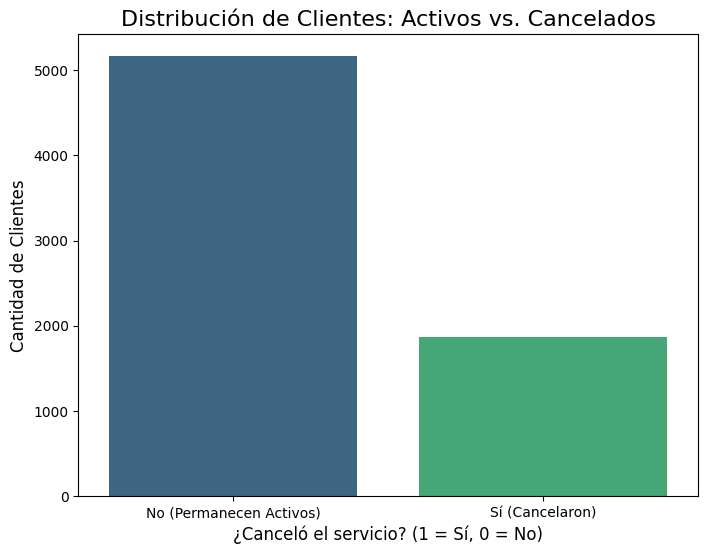

In [334]:
import seaborn as sns
import matplotlib.pyplot as plt



churn_counts = df['Churn'].value_counts()
print("Conteo de clientes por clase:")
print(churn_counts)



churn_percentage = df['Churn'].value_counts(normalize=True) * 100
print("Proporción de clientes por clase (%):")
print(churn_percentage)



print("Visualización del desbalance de clases:")
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df, palette='viridis')


plt.title('Distribución de Clientes: Activos vs. Cancelados', fontsize=16)
plt.xlabel('¿Canceló el servicio? (1 = Sí, 0 = No)', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.xticks([0, 1], ['No (Permanecen Activos)', 'Sí (Cancelaron)']) # Etiquetas más claras


plt.show()

Al revisar el balance, se aprecia una relación aporximada de 80/20, y ya que los datos son pequeños (7032 datos), se opta por hacer un balanceo por la metodología de Balanceo Algorítmico (class_weight)

Se decide realizar los modelos de regresión logistica y arbol de decisiones

In [335]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [336]:
regresion_logisitca_v1 = LogisticRegression(class_weight='balanced', random_state=42)
arbol_decisiones_v1 = DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [337]:
df.columns

Index(['Churn', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'Charges.Monthly', 'Charges.Total',
       'gender_Male', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [338]:
X_class_weight_balanced = df[['SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'Charges.Monthly', 'Charges.Total',
       'gender_Male', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']]
y_class_weight_balanced = df['Churn']

## Entrenamiento del modelo

In [339]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [340]:
X_train, X_test, y_train, y_test = train_test_split(X_class_weight_balanced, y_class_weight_balanced, stratify = y_class_weight_balanced, random_state=42, test_size=0.2)

Normalizamos los datos de entrenamiento sólo para el modelo de regresión logística ya que es sensible a distancias

In [341]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [342]:
regresion_logistica_v1 = regresion_logisitca_v1.fit(X_train_scaled, y_train)
arbol_decisiones_v1 = arbol_decisiones_v1.fit(X_train, y_train)

Examne


In [343]:
y_pred_log = regresion_logisitca_v1.predict(X_test_scaled)
y_pred_arbol = arbol_decisiones_v1.predict(X_test)

In [344]:
from sklearn.metrics import classification_report, confusion_matrix

In [345]:
print("Regresion logistica")
regresion_logisitca_v1= classification_report(y_test,y_pred_log)
print(regresion_logisitca_v1)
print("Árbol de decisiones")
arbol_decisiones_v1 = classification_report(y_test,y_pred_arbol)
print(arbol_decisiones_v1)

Regresion logistica
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1033
           1       0.51      0.80      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.76      1407

Árbol de decisiones
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1033
           1       0.49      0.50      0.50       374

    accuracy                           0.73      1407
   macro avg       0.66      0.66      0.66      1407
weighted avg       0.73      0.73      0.73      1407



# Análisis de correlación


Primero haremos una analisis de Multicolinealidad para encontrar si hay variables muy relacionadas

Se busca mejorar los valores de recall y precision, por lo cual se hace un análsis de correlación para eliminar ruido en los datos

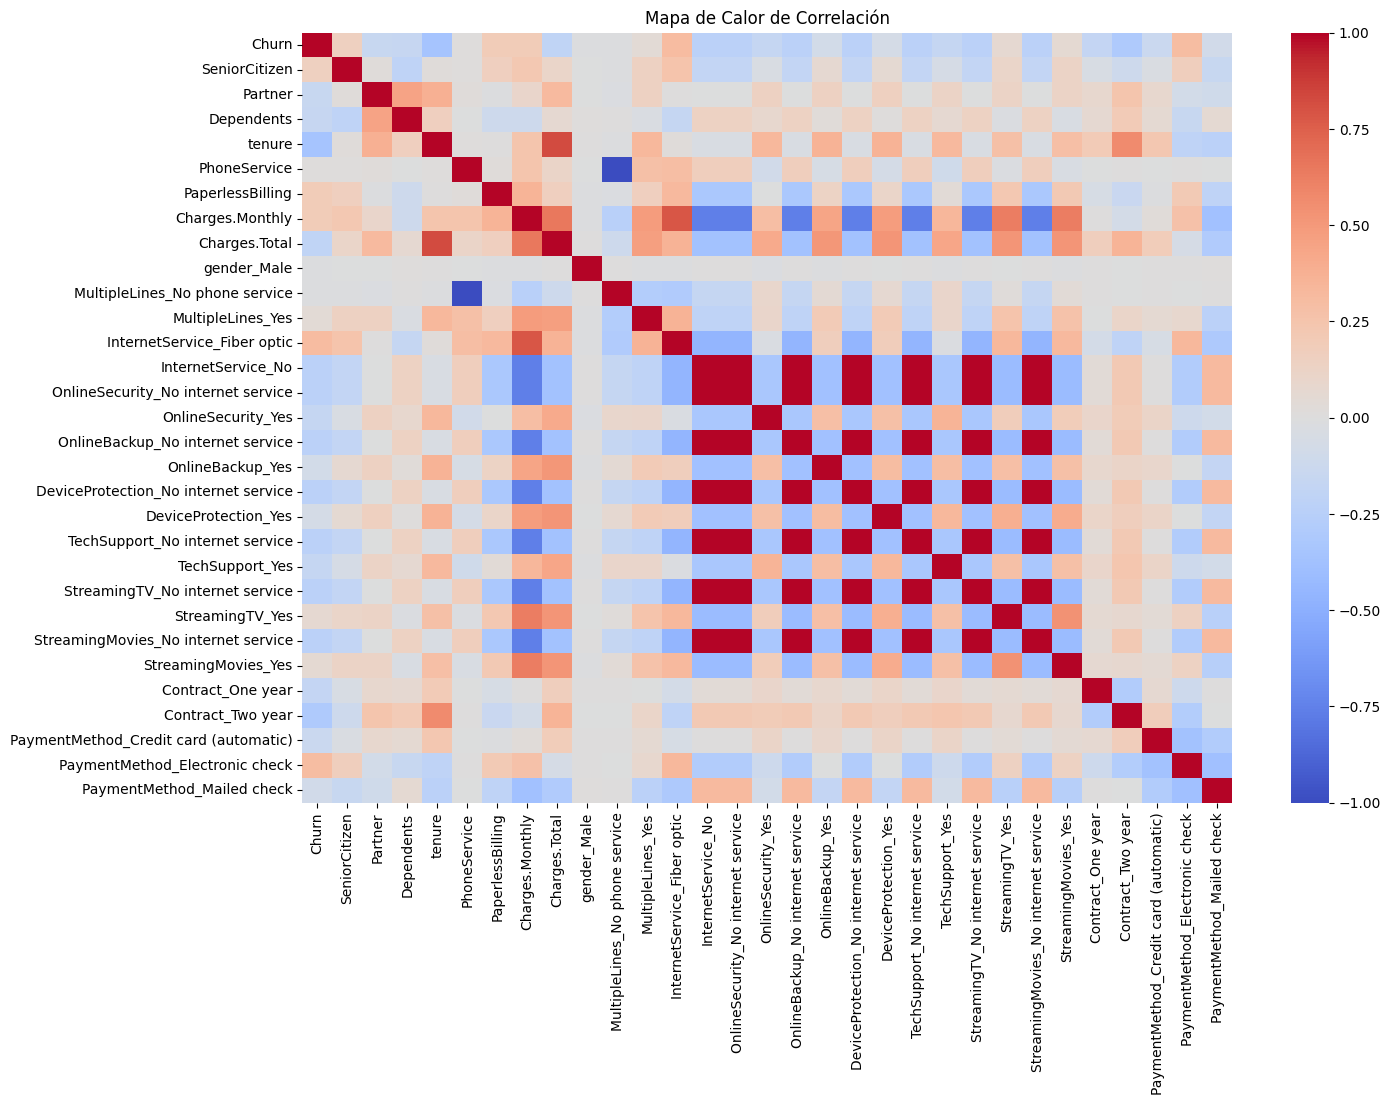

Churn                                    1.000000
InternetService_Fiber optic              0.307463
PaymentMethod_Electronic check           0.301455
Charges.Monthly                          0.192858
PaperlessBilling                         0.191454
SeniorCitizen                            0.150541
StreamingTV_Yes                          0.063254
StreamingMovies_Yes                      0.060860
MultipleLines_Yes                        0.040033
PhoneService                             0.011691
gender_Male                             -0.008545
MultipleLines_No phone service          -0.011691
DeviceProtection_Yes                    -0.066193
OnlineBackup_Yes                        -0.082307
PaymentMethod_Mailed check              -0.090773
PaymentMethod_Credit card (automatic)   -0.134687
Partner                                 -0.149982
Dependents                              -0.163128
TechSupport_Yes                         -0.164716
OnlineSecurity_Yes                      -0.171270


In [346]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calculamos la matriz de correlación
# Asegúrate de usar tu df con las variables numéricas y las codificadas (dummies)
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

# 2. Ver correlación específica con el Churn
# Esto te dirá qué variables son las que MÁS importan y cuáles son basura (cercanas a 0)
correlacion_churn = df.corr()['Churn'].sort_values(ascending=False)
print(correlacion_churn)

## VIF

In [347]:
df_num = df[['tenure','Charges.Monthly','Charges.Total']]
df_num

,tenure,Charges.Monthly,Charges.Total
0,9,65.60,593.30
1,9,59.90,542.40
2,4,73.90,280.85
3,13,98.00,1237.85
4,3,83.90,267.40
...,...,...,...
7027,13,55.15,742.90
7028,22,85.10,1873.70
7029,2,50.30,92.75
7030,67,67.85,4627.65


In [348]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [349]:
X = add_constant(df_num)
vif_data = pd.DataFrame()
vif_data["variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,variable,VIF
0,const,14.973839
1,tenure,5.844646
2,Charges.Monthly,3.225293
3,Charges.Total,9.526697


Charges.Total al tener un VIf mayor a 5 y cercano a 5, se decide eliminar por Multicolinealidad y se procede a realizar de nuevo la prueba

In [350]:
df_num = df_num.drop(['Charges.Total'], axis=1)
X = add_constant(df_num)
vif_data = pd.DataFrame()
vif_data["variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,variable,VIF
0,const,6.302752
1,tenure,1.064896
2,Charges.Monthly,1.064896


Se identifica que hay columnas con terminación "_No internet service" las cuales son variables hijas de la variable InternetService_No, resultan ser reduntantes, por lo cual generan ruido y serán eliminadas. Además por la prueba anterior VIF, se determina que Charges.Total también será eliminada. Aunado a lo anterior, se utilizó en la función de OneHotEncoder, la función de drop='first' para eliminar las columnas que resultan repetitivas, resultado de las columnas generadas de solo dos opcioones, ya que si es una variable, entonces no será la otra y viceversa

In [351]:
df.columns

Index(['Churn', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'Charges.Monthly', 'Charges.Total',
       'gender_Male', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [352]:
df = df.drop(['Charges.Total',
       'MultipleLines_No phone service',
       'OnlineSecurity_No internet service',
       'OnlineBackup_No internet service',
       'DeviceProtection_No internet service',
       'TechSupport_No internet service',
       'StreamingTV_No internet service',
       'StreamingMovies_No internet service',], axis = 1)

Se recalcula el VIF con todas las variables

In [353]:
X = add_constant(df)
vif_data = pd.DataFrame()
vif_data["variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,variable,VIF
0,const,619.284060
1,Churn,1.387466
2,SeniorCitizen,1.155142
3,Partner,1.462797
4,Dependents,1.381356
5,tenure,2.921472
6,PhoneService,34.892265
7,PaperlessBilling,1.211939
8,Charges.Monthly,863.777515
9,gender_Male,1.001948


Al analizar el VIF, se identifica que Charges.Monthly	tiene alta colinealidad, lo que podría deber a que es un resultado de la suma de servicios al final de la factura mensual, por lo cual se elimina Charges.Monthly	y se recalcula el VIF

In [354]:
df = df.drop(['Charges.Monthly'], axis = 1)
X = add_constant(df)
vif_data = pd.DataFrame()
vif_data["variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,variable,VIF
0,const,24.119169
1,Churn,1.387380
2,SeniorCitizen,1.155111
3,Partner,1.462373
4,Dependents,1.381318
5,tenure,2.921471
6,PhoneService,1.356950
7,PaperlessBilling,1.211849
8,gender_Male,1.001801
9,MultipleLines_Yes,1.426564


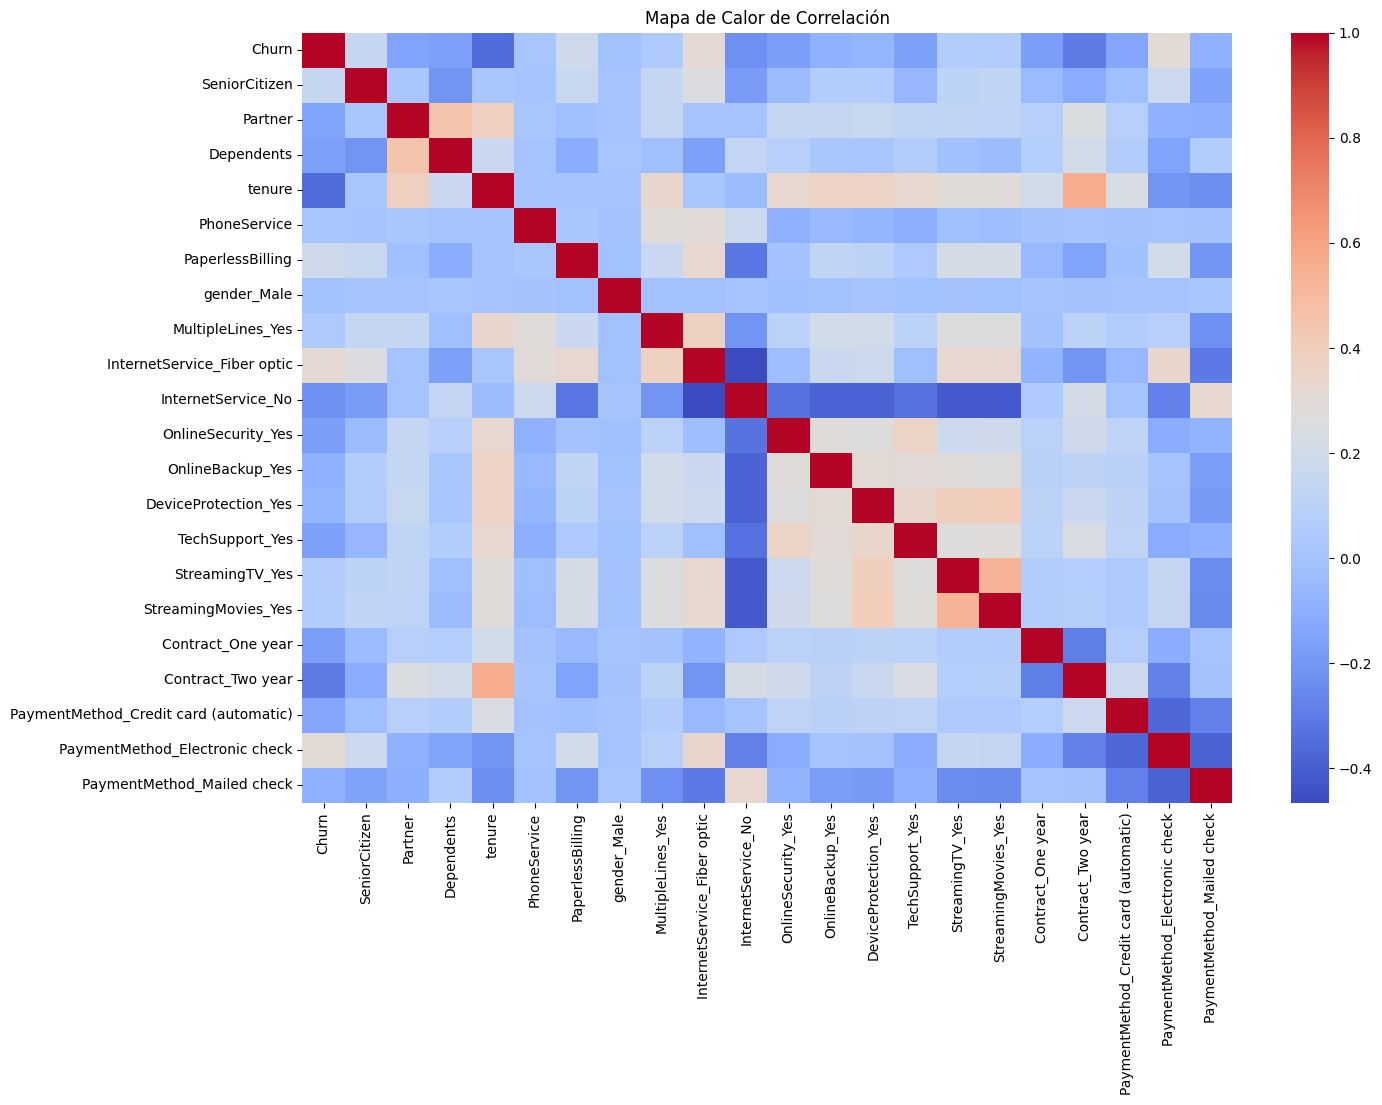

Churn                                    1.000000
InternetService_Fiber optic              0.307463
PaymentMethod_Electronic check           0.301455
PaperlessBilling                         0.191454
SeniorCitizen                            0.150541
StreamingTV_Yes                          0.063254
StreamingMovies_Yes                      0.060860
MultipleLines_Yes                        0.040033
PhoneService                             0.011691
gender_Male                             -0.008545
DeviceProtection_Yes                    -0.066193
OnlineBackup_Yes                        -0.082307
PaymentMethod_Mailed check              -0.090773
PaymentMethod_Credit card (automatic)   -0.134687
Partner                                 -0.149982
Dependents                              -0.163128
TechSupport_Yes                         -0.164716
OnlineSecurity_Yes                      -0.171270
Contract_One year                       -0.178225
InternetService_No                      -0.227578


In [355]:

plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

correlacion_churn = df.corr()['Churn'].sort_values(ascending=False)
print(correlacion_churn)

Utilizamos un rango de correlación para definir qué variables eliminar:

|r| < 0.05: Correlación muy débil o nula. por lo cual las descaratermos

0.05 < |r| < 0.3: Correlación débil. Las cuales mantendremos

|r| > 0.3: Correlación moderada a fuerte. Las cuales mantendremos

In [356]:
df_sin_colinealidad = df.drop(['MultipleLines_Yes','PhoneService','gender_Male'], axis = 1)


In [357]:
df_sin_colinealidad.columns

Index(['Churn', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PaperlessBilling', 'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [358]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [359]:
regresion_logisitca_v2 = LogisticRegression(class_weight='balanced', random_state=42)
arbol_decisiones_v2 = DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [360]:
df_sin_colinealidad.columns

Index(['Churn', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PaperlessBilling', 'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [361]:
X_class_weight_balanced = df[['SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PaperlessBilling', 'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']]
y_class_weight_balanced = df['Churn']

## Entrenamiento del modelo

In [362]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [363]:
X_train, X_test, y_train, y_test = train_test_split(X_class_weight_balanced, y_class_weight_balanced, stratify = y_class_weight_balanced, random_state=42, test_size=0.2)

Normalizamos los datos de entrenamiento sólo para el modelo de regresión logística ya que es sensible a distancias

In [364]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Entrenamiento de modelo

In [365]:
regresion_logistica_v2 = regresion_logisitca_v2.fit(X_train_scaled, y_train)
arbol_decisiones_v2 = arbol_decisiones_v2.fit(X_train, y_train)

Examne


In [366]:
y_pred_log = regresion_logisitca_v2.predict(X_test_scaled)
y_pred_arbol = arbol_decisiones_v2.predict(X_test)

In [367]:
from sklearn.metrics import classification_report, confusion_matrix

In [368]:

print("Regresion logistica 1")
print(regresion_logisitca_v1)

print("Regresion logistica 2")
regresion_logisitca_v2= classification_report(y_test,y_pred_log)
print(regresion_logisitca_v2)

print("Árbol de decisiones 1")
print(arbol_decisiones_v1)

print("Árbol de decisiones 2")
arbol_decisiones_v2 = classification_report(y_test,y_pred_arbol)
print(arbol_decisiones_v2)

Regresion logistica 1
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1033
           1       0.51      0.80      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.76      1407

Regresion logistica 2
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1033
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.76      1407

Árbol de decisiones 1
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1033
           1       0.49      0.50      0.50       374

    accuracy                           0.73      1407
   macro avg       0.66      0.66      0.66      1407
weighted

# Guardado del modelo

In [369]:
import pickle

Aquí guardaré un diccionario para que al generar el archvio .pkl, no se rompa en la API, ya que investigué que es necesario indicar las librerías que se usaron para que funcione correctamente el modelo

In [370]:
paquete_modelo = {
    'modelo' : regresion_logistica_v1,
    'scaler' : scaler,
    'encoder' : encoder
}

with open('modelo_telecom_completo.pkl', 'wb') as archivo:
    pickle.dump(paquete_modelo, archivo)